In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## define the maze

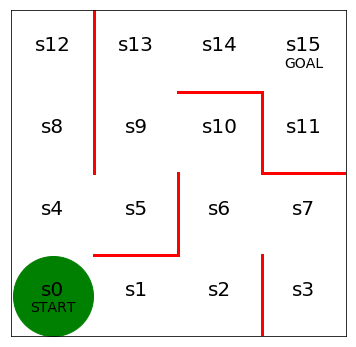

In [34]:
fig = plt.figure(figsize=(6, 6))
ax = plt.gca()  # gca = get current axes

# draw red wall
plt.plot([3, 4], [2, 2], color='red', linewidth=3)
plt.plot([2, 2], [1, 2], color='red', linewidth=3)
plt.plot([1, 1], [2, 4], color='red', linewidth=3)
plt.plot([1, 2], [1, 1], color='red', linewidth=3)
plt.plot([2, 3], [3, 3], color='red', linewidth=3)
plt.plot([3, 3], [2, 3], color='red', linewidth=3)
plt.plot([3, 3], [0, 1], color='red', linewidth=3)

# -- describe the state number
s_num = 0
for j in range(4):
    for i in range(4):
        plt.text(i+0.5, j+0.5, 's{}'.format(s_num), size=20, ha='center')
        s_num += 1
        
# -- setup the START and GOAL
plt.text(0.5, 0.3, 'START', ha='center', fontsize=14)
plt.text(3.5, 3.3, 'GOAL', ha='center', fontsize=14)

# -- reformat size
ax.set_xlim(0, 4)
ax.set_ylim(0, 4)
plt.tick_params(axis='both', which='both', bottom=False, top=False,
                labelbottom=False, right=False, left=False, labelleft=False)

# -- render the green circle in current state (initial state is START)
line, = ax.plot([0.5], [0.5], marker="o", color='g', markersize=80)

## define theta 

In [35]:
#                 ["UP"  , "RIGHT", "DOWN", "LEFT"]
theta = np.array([[1     , 1      , np.nan, np.nan], #s0
                  [np.nan, 1      , np.nan, 1     ], #s1
                  [1     , np.nan , np.nan, 1     ], #s2
                  [1     , np.nan , np.nan, np.nan], #s3
                  [1     , 1      , 1     , np.nan], #s4
                  [1     , np.nan , np.nan, 1     ], #s5
                  [1     , 1      , np.nan, 1     ], #s6
                  [np.nan, np.nan , 1     , 1     ], #s7
                  [1     , np.nan , 1     , np.nan], #s8
                  [1     , 1      , 1     , np.nan], #s9
                  [np.nan, np.nan , 1     , 1     ], #s10
                  [1     , np.nan , np.nan, np.nan], #s11
                  [np.nan, np.nan , 1     , np.nan], #s12
                  [np.nan, 1      , 1     , np.nan], #s13
                  [np.nan, 1      , np.nan, 1     ], #s14
])

## convert theta into Policy Pi

In [36]:
def convert_theta_into_pi(theta):
    
    i, j = theta.shape
    pi = np.zeros((i, j))
    for row in range(i):
        # get probability of action
        pi[row] = theta[row] / np.nansum(theta[row])
        
    pi = np.nan_to_num(pi)
    return pi

pi_0 = convert_theta_into_pi(theta)
print(pi_0)

[[0.5        0.5        0.         0.        ]
 [0.         0.5        0.         0.5       ]
 [0.5        0.         0.         0.5       ]
 [1.         0.         0.         0.        ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.5        0.         0.         0.5       ]
 [0.33333333 0.33333333 0.         0.33333333]
 [0.         0.         0.5        0.5       ]
 [0.5        0.         0.5        0.        ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [0.         0.         1.         0.        ]
 [0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]]


## initialize Q function

In [37]:
i, j = pi_0.shape
Q = np.random.rand(i, j) * theta * 0.1
# In order to avoid miss action in early exeperiments,
# multiplying 0.1 

print(Q)

[[0.05530476 0.01454449        nan        nan]
 [       nan 0.09485894        nan 0.030054  ]
 [0.03625115        nan        nan 0.07264296]
 [0.07192006        nan        nan        nan]
 [0.02679807 0.0438676  0.01892074        nan]
 [0.06793997        nan        nan 0.08354537]
 [0.0332339  0.03827308        nan 0.00899734]
 [       nan        nan 0.02628804 0.04320383]
 [0.08128567        nan 0.02012987        nan]
 [0.04520838 0.09280039 0.06129936        nan]
 [       nan        nan 0.09407815 0.01472491]
 [0.09647497        nan        nan        nan]
 [       nan        nan 0.02742475        nan]
 [       nan 0.09779039 0.06648647        nan]
 [       nan 0.03951945        nan 0.06281584]]


In [38]:
def get_next_action(s, Q, pi, epsilon) -> str:
    # return 'UP', 'DOWN', 'RIGHT', 'LEFT'
    
    # epsilon-greedy
    if np.random.rand() < epsilon:
        next_action = np.random.choice(list(directions), p=pi[s, :])
    else:
        next_action = list(directions)[np.nanargmax(Q[s, :])] 
        
    return next_action

def get_s_next(s, next_a) -> int:
    # return state num
    
    for idx, act in enumerate(directions):
        if act == next_a:
            return s + directions[act]
        

In [39]:
# - test
# s = 9
# next_a = get_next_action(s, Q, pi_0, 0.3)
# print("next_action is {}".format(next_a))
# next_s = get_s_next(s, next_a)
# print("next state is {}".format(next_s))

## define Q learning

In [40]:
def update_q_table(Q, s, a, r, s_next, eta, gamma):
    
    a_col = action2col[a]
    if s_next == 15:
        Q[s, a_col] = Q[s, a_col] + eta * (r - Q[s, a_col])
        return Q.copy()
    else:
        Q[s, a_col] = Q[s, a_col] + eta * (r + gamma * np.nanmax(Q[s_next, :]) - Q[s, a_col])
        return Q.copy()

## define Sarsa

In [41]:
def Sarsa(Q, s, a, r, s_next, a_next, eta, gamma):

    a_col = action2col[a]
    if s_next == 15:  # goal
        Q[s, a_col] = Q[s, a_col] + eta * (r - Q[s, a_col])

    else:
        Q[s, a_col] = Q[s, a_col] + eta * (r + gamma * Q[s_next, a_next] - Q[s, a_col])

    return Q.copy()

In [42]:
def play_maze(Q, pi, epsilon, eta, gamma, update_method="q_learning"): # TODO: insert Sarsa
    # return state_action_history, updated Q function
    s = 0
    s_a_history = [[0, np.nan]]
    # substitute action later
    
    trial_num  = 0
    a_next = get_next_action(s, Q, pi, epsilon)
    # はじめなのでaをa_nextとも置く。
    
    while True:
        # print("current state: {}, next action : {}".format(s, action))
        action = a_next 
        
        trial_num += 1
        
        s_a_history[-1][1] = action
        
        s_next = get_s_next(s=s, next_a=action)
       
        s_a_history.append([s_next, np.nan])
        
        if s_next == 15:
            r = 1
            a_next = None
        else:
            r = 0
            a_next = get_next_action(s_next, Q, pi, epsilon)
        
        if update_method == "q_learning":
            Q = update_q_table(Q, s, action, r, s_next, eta, gamma)
        if update_method == "sarsa":
            Q = update_q_table(Q, s, action, r, s_next, a_next, eta, gamma)
        
        if s_next == 15:
            break
        else:
            s = s_next
        
    return s_a_history, Q


In [43]:
# - define the const

eta = 0.1   # learning rate
GAMMA = 0.9 # discount rate
epsilon = 0.5
continue_flg = True
episode = 1
directions = {'UP'   :  4,
              'RIGHT':  1,
              'DOWN' : -4,
              'LEFT' : -1
             }

action2col = { act: col for col,act in enumerate(directions) }
i, j = pi_0.shape
Q = np.random.rand(i, j) * theta * 0.1
initial_Q = Q.copy()
Q_sarsa = Q.copy()
Q_Q_learning = Q.copy()
V_sarsa = np.nanmax(Q, axis=1).reshape(1, -1)
V_Q_learning = np.nanmax(Q, axis=1).reshape(1, -1)
print(V)

while continue_flg:
    
    print("========== Episode: {} ==========".format(episode))
    epsilon /= 2
    
    s_a_history, new_Q = play_maze(Q, pi_0, epsilon, eta, GAMMA)
    new_v = np.nanmax(new_Q, axis=1).reshape(1, -1)
    V = np.append(V, new_v, axis=0)
    Q = new_Q.copy()
    print("step size in this trial is {}.".format(len(s_a_history)-1))
    
    episode += 1
    if episode >= 100:
        continue_flg = False
        
v_16 = np.ones((100,1))
V = np.concatenate((V, v_16), axis=1).reshape(-1, 4, 4)

[[0.09021101 0.08278263 0.05391907 0.03215845 0.02826004 0.03241657
  0.0689584  0.04031863 0.01923891 0.06445489 0.05011225 0.08353263
  0.02059041 0.06898652 0.03389203]]
========== Episode: 1 ==========
step size in this trial is 56.
========== Episode: 2 ==========
step size in this trial is 72.
========== Episode: 3 ==========
step size in this trial is 106.
========== Episode: 4 ==========
step size in this trial is 16.
========== Episode: 5 ==========
step size in this trial is 20.
========== Episode: 6 ==========
step size in this trial is 22.
========== Episode: 7 ==========
step size in this trial is 26.
========== Episode: 8 ==========
step size in this trial is 26.
========== Episode: 9 ==========
step size in this trial is 26.
========== Episode: 10 ==========
step size in this trial is 22.
========== Episode: 11 ==========
step size in this trial is 18.
========== Episode: 12 ==========
step size in this trial is 22.
========== Episode: 13 ==========
step size in this tri

# TODO : investigate the differences between q-learning and Sarsa

In [44]:
from matplotlib.animation import FuncAnimation

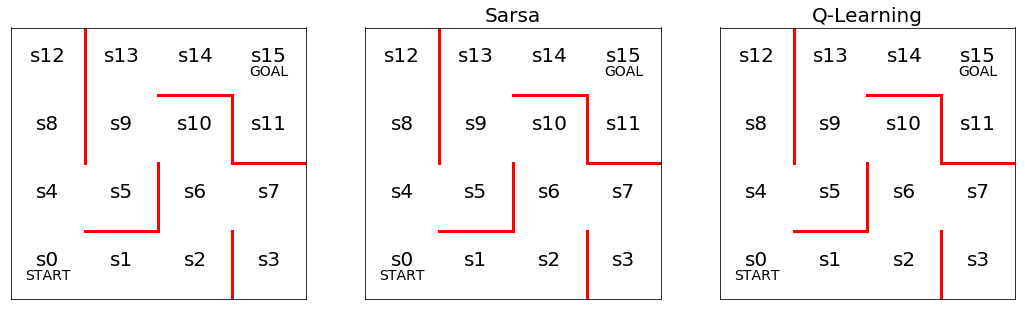

In [64]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18, 5))

ax2.set_title("Sarsa",fontsize=20)
ax3.set_title("Q-Learning",fontsize=20)

for ax in [ax1, ax2, ax3]:
    ax.plot([2.5, 3.5], [1.5 , 1.5], color='red', linewidth=3)
    ax.plot([1.5, 1.5], [0.5 , 1.5], color='red', linewidth=3)
    ax.plot([0.5, 0.5], [1.5 , 3.5], color='red', linewidth=3)
    ax.plot([0.5, 1.5], [0.5 , 0.5], color='red', linewidth=3)
    ax.plot([1.5, 2.5], [2.5 , 2.5], color='red', linewidth=3)
    ax.plot([2.5, 2.5], [1.5 , 2.5], color='red', linewidth=3)
    ax.plot([2.5, 2.5], [-0.5, 0.5], color='red', linewidth=3)
    ax.text(0, -0.2, 'START', ha='center', fontsize=14)
    ax.text(3, 2.8, 'GOAL', ha='center', fontsize=14)

    # -- reformat size
    ax.set_xlim(-0.5, 3.5)
    ax.set_ylim(-0.5, 3.5)
    # -- describe the state number
    s_num = 0
    for j in range(4):
        for i in range(4):
            ax.text(i, j, 's{}'.format(s_num), size=20, ha='center')
            s_num += 1

    ax.tick_params(axis='both', which='both', bottom=False, top=False,
                    labelbottom=False, right=False, left=False, labelleft=False)

In [65]:
def update(i):
    ax1.set_title("episode: {}".format(i),fontsize=20)
    ax2.imshow(V[i])

anim = FuncAnimation(fig, update, interval=100 ,frames=len(V))
anim.save("Sarsa.mp4", writer="ffmpeg")